In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Handle missing values 
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Replace '3+' with 3 and convert the column to numeric type
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)


df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(float)
df['Credit_History'] = df['Credit_History'].astype(float)


In [12]:
# Convert categorical columns to 'category' data type
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Convert numerical columns to appropriate data types
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  

print(df.dtypes)


Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object


In [13]:
# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Education'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

In [14]:
df.shape

(614, 13)

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


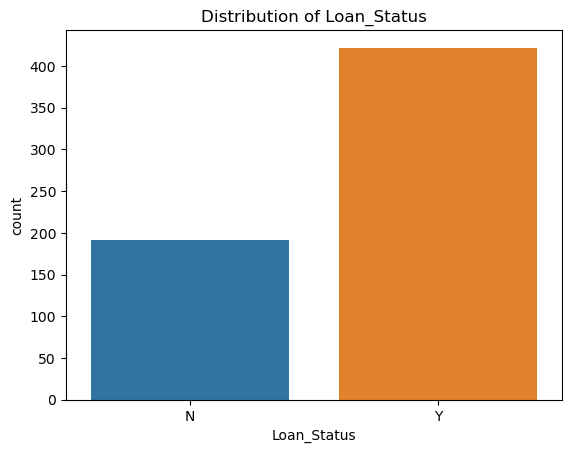

In [15]:
# Visualize the distribution of Loan_Status
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan_Status')
plt.show()

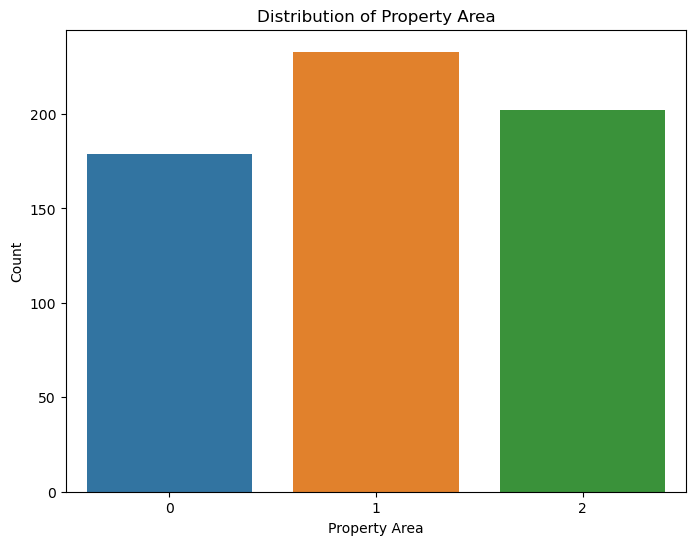

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', data=df)
plt.title('Distribution of Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


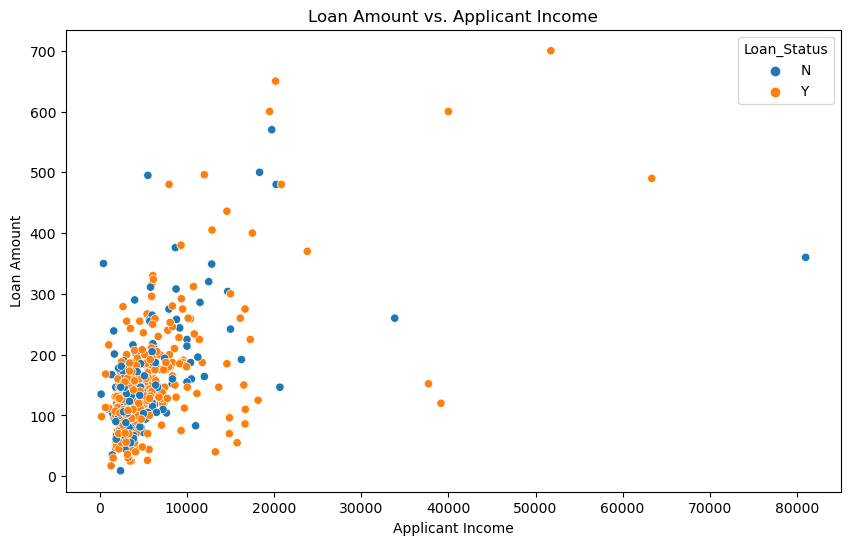

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()


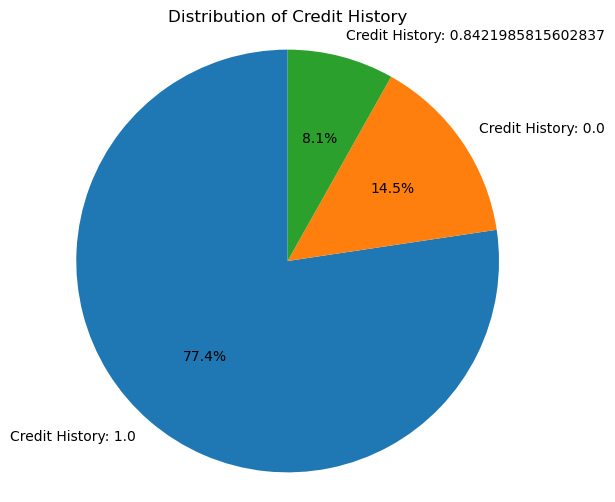

In [18]:
# Get the unique values and their counts from the 'Credit_History' column
credit_history_counts = df['Credit_History'].value_counts()

# Generate labels dynamically based on unique values in 'Credit_History'
labels = [f'Credit History: {value}' for value in credit_history_counts.index]

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(credit_history_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Credit History')
plt.axis('equal')  
plt.show()


In [17]:
# Split the dataset into independent variables (X) and dependent variable (y)
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [18]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and evaluation
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Cross-validation
    cv_score = cross_val_score(pipeline, X_scaled, y, cv=5, scoring='accuracy').mean()
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate on test set
    test_score = pipeline.score(X_test, y_test)
    
    print(f"Model: {name}")
    print(f"Cross-validation Score: {cv_score:.4f}")
    print(f"Test Score: {test_score:.4f}")
    print("-" * 50)


Model: Logistic Regression
Cross-validation Score: 0.8046
Test Score: 0.7886
--------------------------------------------------
Model: Decision Tree
Cross-validation Score: 0.7118
Test Score: 0.7073
--------------------------------------------------
Model: Random Forest
Cross-validation Score: 0.7818
Test Score: 0.7724
--------------------------------------------------
Model: SVM
Cross-validation Score: 0.8029
Test Score: 0.7886
--------------------------------------------------
Model: Gradient Boosting
Cross-validation Score: 0.7785
Test Score: 0.7561
--------------------------------------------------


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize Logistic Regression model
lr = LogisticRegression()

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search model
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Best cross-validation score
print("Best cross-validation score for Logistic Regression:", grid_search_lr.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.8145949288806431


    Actual Predicted
350      Y         Y
377      Y         Y
163      Y         Y
609      Y         Y
132      Y         Y
578      Y         Y
316      Y         Y
2        Y         Y
340      N         Y
77       N         Y


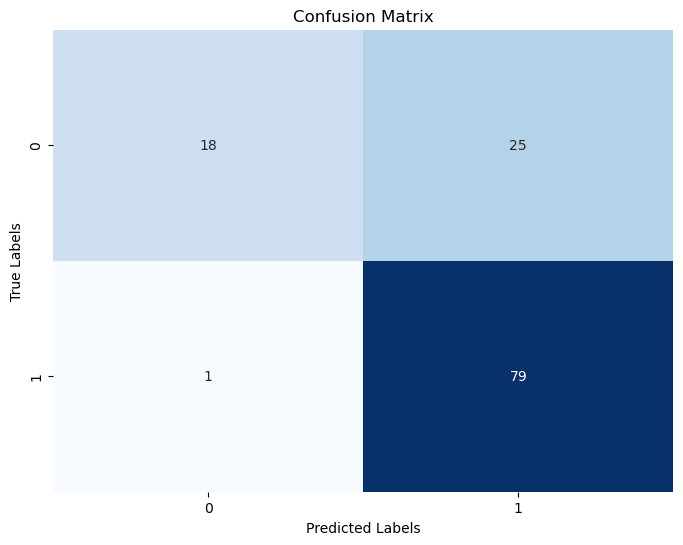


Accuracy Score: 78.86%


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Get the best Logistic Regression model from GridSearchCV
best_lr_model = grid_search_lr.best_estimator_

# Predict on the test set
y_pred = best_lr_model.predict(X_test)

# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display actual vs predicted values
print(comparison_df.head(10))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy * 100:.2f}%")
